<a href="https://colab.research.google.com/github/renanteod/GCollab/blob/main/roteiro02-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Roteiro Processamento de imagem**
## Utilizar este Notebook para executar os comandos.
**Arquivo de referência:** *Roteiro Processamento de imagem.docx*


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread("IMAGE/bomb.jpg", cv2.IMREAD_GRAYSCALE)

In [8]:
import matplotlib.pyplot as plt
plt.imshow(image, cmap='gray')
plt.show()
#

NameError: name 'image' is not defined

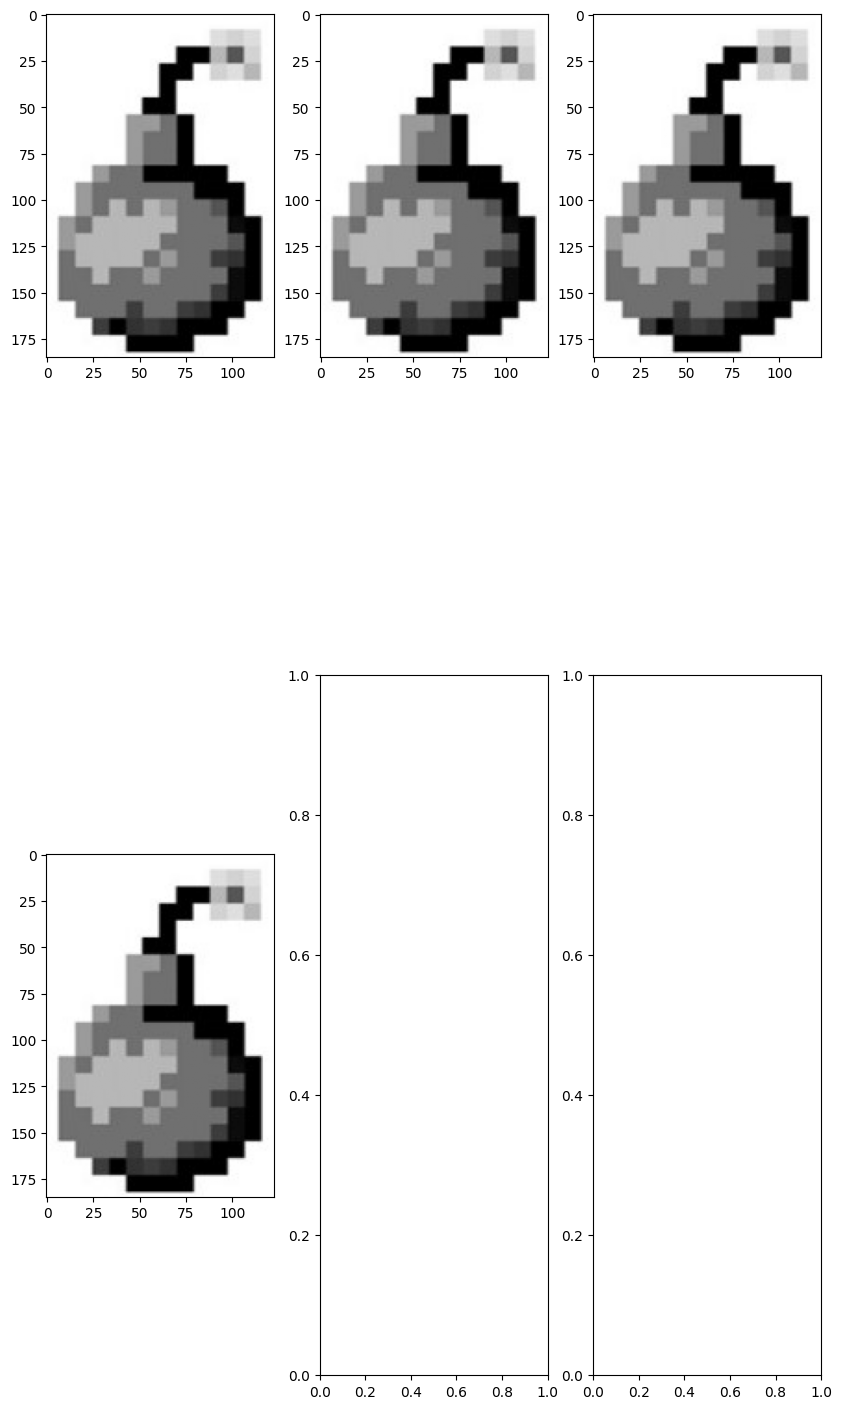

In [11]:
fig, axes = plt.subplots(2,3, figsize = (10,20))
axes[0][0].imshow(image, cmap='gray')
axes[0][1].imshow(image, cmap='gray')
axes[0][2].imshow(image, cmap='gray')
axes[1][0].imshow(image, cmap='gray')


In [7]:
from skimage.util import invert

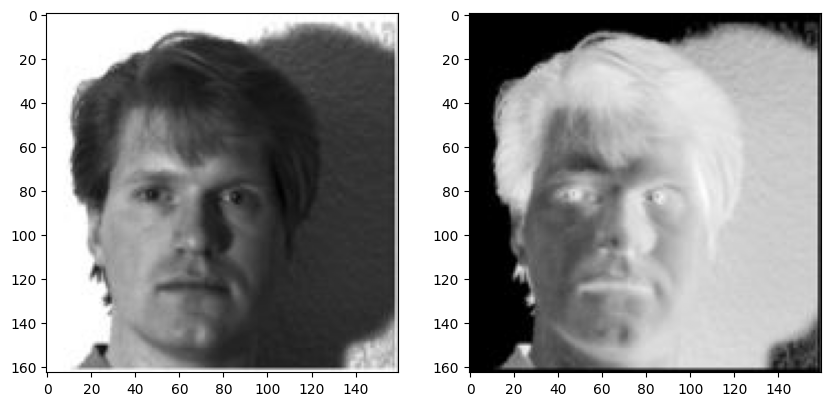

In [20]:
image1 = cv2.imread("IMAGE/person.jpg", cv2.IMREAD_GRAYSCALE)
negative_image1 = invert(image1)
fig, ax = plt.subplots(1,2, figsize = (10,20))
ax[0].imshow(image1, cmap='gray')
ax[1].imshow(negative_image1, cmap='gray')
#

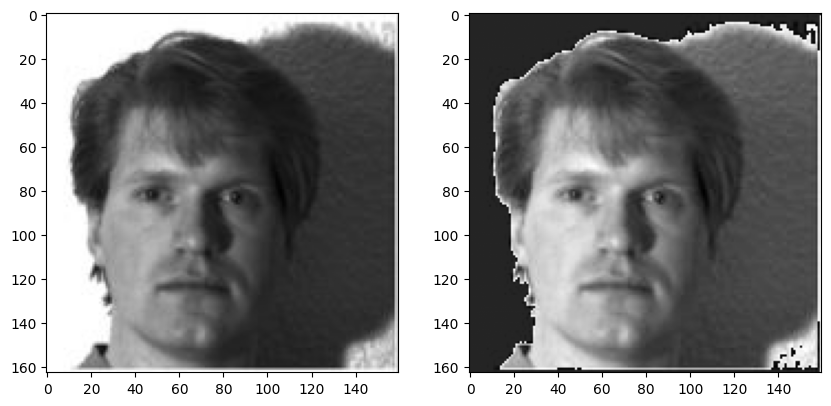

In [31]:
from skimage.exposure import adjust_log

image2 = cv2.imread("IMAGE/person.jpg", cv2.IMREAD_GRAYSCALE)
log_image2 = adjust_log(image2, gain=1.15)
fig, ax = plt.subplots(1,2, figsize = (10,20))
ax[0].imshow(image2, cmap='gray')
ax[1].imshow(log_image2, cmap='gray')

In [72]:
from skimage.exposure import adjust_gamma

image3 = cv2.imread("IMAGE/forest.jpg", cv2.IMREAD_GRAYSCALE)
gama_image = adjust_gamma(image3, gamma=0.6, gain=1.1)

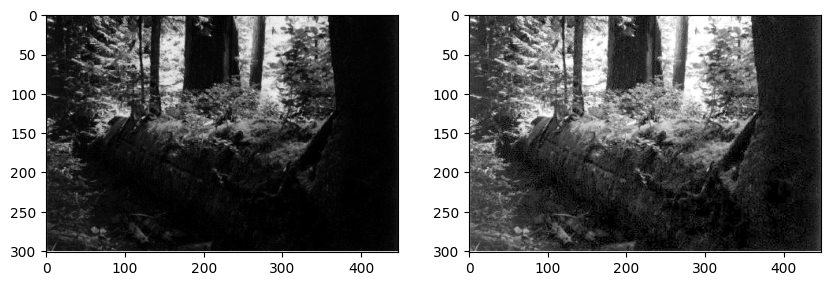

In [73]:
fig, ax = plt.subplots(1,2, figsize = (10,20))
ax[0].imshow(image3, cmap='gray')
ax[1].imshow(gama_image, cmap='gray')

In [3]:
def pixelval(img, r1, s1, r2, s2):
  if (0 <= img and img <= r1):
    return (s1 / r1)*img
  elif (r1 < img and img <= r2):
    return ((s2 - s1)/(r2 - r1)) * (img - r1) +s1
  else:
    return ((255 - s2)/(255 - r2)) * (img - r2) + s2

In [17]:
r1=100
s1=0
r2=150
s2=255

In [18]:
image4 = cv2.imread("IMAGE/forest.jpg", cv2.IMREAD_GRAYSCALE)

pixelVal_vec= np.vectorize(pixelval)
image_contr = pixelVal_vec(image4, r1, s1, r2, s2)
print(image_contr)
image_contr = np.array(image_contr, dtype = np.uint8)
print(image_contr)

[[255.   0.   0. ...   0.   0. 255.]
 [153.   0.   0. ...   0.   0. 255.]
 [255.   0.   0. ...   0.   0. 255.]
 ...
 [255.   0.   0. ...   0.   0. 255.]
 [255.   0.   0. ...   0.   0. 255.]
 [255. 255. 255. ... 255. 255. 255.]]
[[255   0   0 ...   0   0 255]
 [153   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 ...
 [255   0   0 ...   0   0 255]
 [255   0   0 ...   0   0 255]
 [255 255 255 ... 255 255 255]]


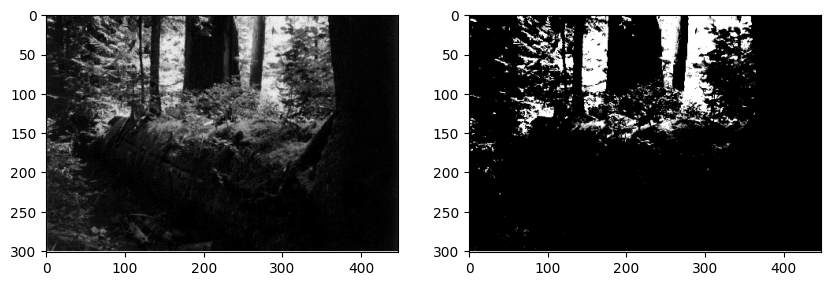

In [19]:
fig, ax = plt.subplots(1,2, figsize = (10,20))
ax[0].imshow(image4, cmap='gray')
ax[1].imshow(image_contr, cmap='gray')

In [27]:
image5 = cv2.imread("IMAGE/polenescuro.jpg", cv2.IMREAD_GRAYSCALE)
image6 = cv2.imread("IMAGE/polenclaro.jpg", cv2.IMREAD_GRAYSCALE)
image7 = cv2.imread("IMAGE/polencaixocontraste.jpg", cv2.IMREAD_GRAYSCALE)
image8 = cv2.imread("IMAGE/polenaltocontraste.jpg", cv2.IMREAD_GRAYSCALE)

In [28]:
bins = 100
hist1= cv2.calcHist([image5],[0],None,[bins],[0,255])
hist2= cv2.calcHist([image6],[0],None,[bins],[0,255])
hist3= cv2.calcHist([image7],[0],None,[bins],[0,255])
hist4= cv2.calcHist([image8],[0],None,[bins],[0,255])


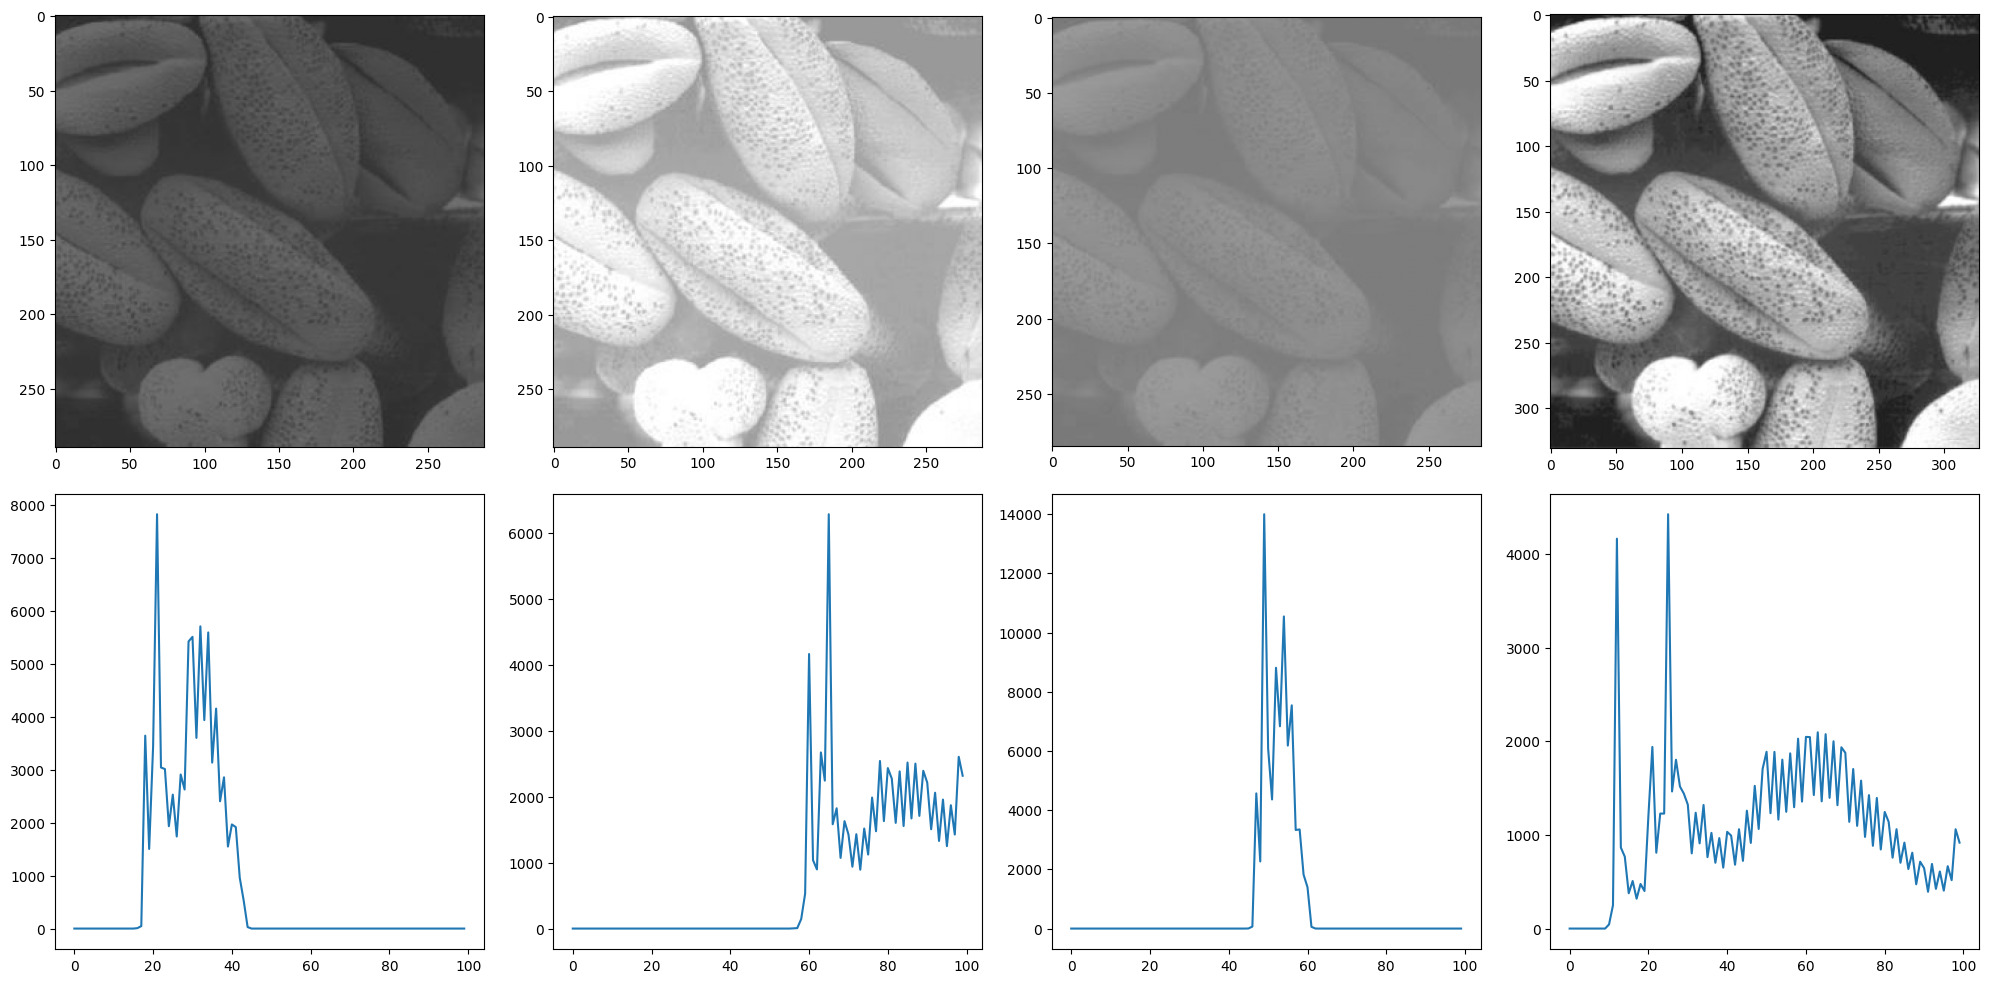

In [29]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))

axes[0,0].imshow(image5, cmap='gray', vmin=0, vmax=255)
axes[0,1].imshow(image6, cmap='gray', vmin=0, vmax=255)
axes[0,2].imshow(image7, cmap='gray', vmin=0, vmax=255)
axes[0,3].imshow(image8, cmap='gray', vmin=0, vmax=255)
axes[1,0].plot(hist1)
axes[1,1].plot(hist2)
axes[1,2].plot(hist3)
axes[1,3].plot(hist4)
plt.tight_layout()
plt.show()


In [38]:
image_equalized5 = cv2.equalizeHist(image5) #Altere o nome da imagem
hist_equalized5 = cv2.calcHist([image_equalized5],[0],None,[bins],[0,255])

image_equalized6 = cv2.equalizeHist(image6) #Altere o nome da imagem
hist_equalized6 = cv2.calcHist([image_equalized6],[0],None,[bins],[0,255])

image_equalized7 = cv2.equalizeHist(image7) #Altere o nome da imagem
hist_equalized7 = cv2.calcHist([image_equalized7],[0],None,[bins],[0,255])

image_equalized8 = cv2.equalizeHist(image8) #Altere o nome da imagem
hist_equalized8 = cv2.calcHist([image_equalized8],[0],None,[bins],[0,255])


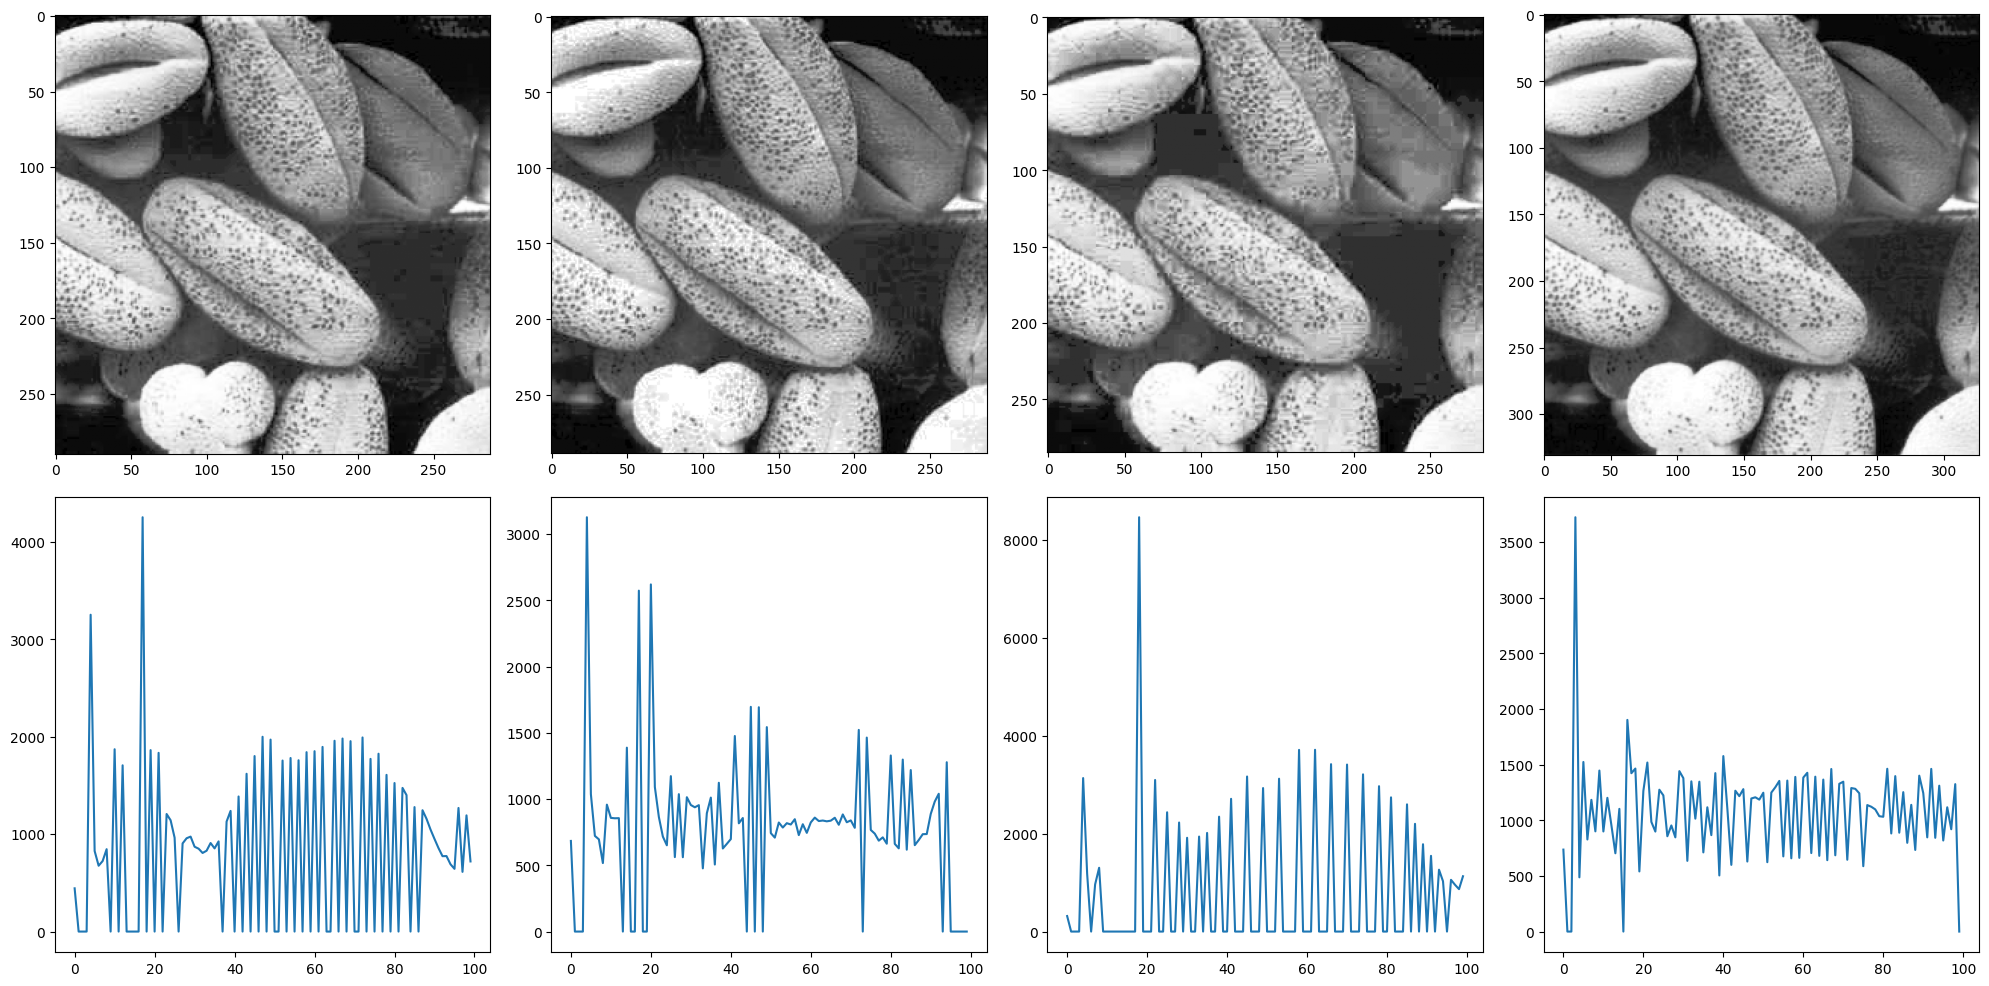

In [39]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))

axes[0,0].imshow(image_equalized5, cmap='gray', vmin=0, vmax=255)
axes[0,1].imshow(image_equalized6, cmap='gray', vmin=0, vmax=255)
axes[0,2].imshow(image_equalized7, cmap='gray', vmin=0, vmax=255)
axes[0,3].imshow(image_equalized8, cmap='gray', vmin=0, vmax=255)
axes[1,0].plot(hist_equalized5)
axes[1,1].plot(hist_equalized6)
axes[1,2].plot(hist_equalized7)
axes[1,3].plot(hist_equalized8)
plt.tight_layout()
plt.show()


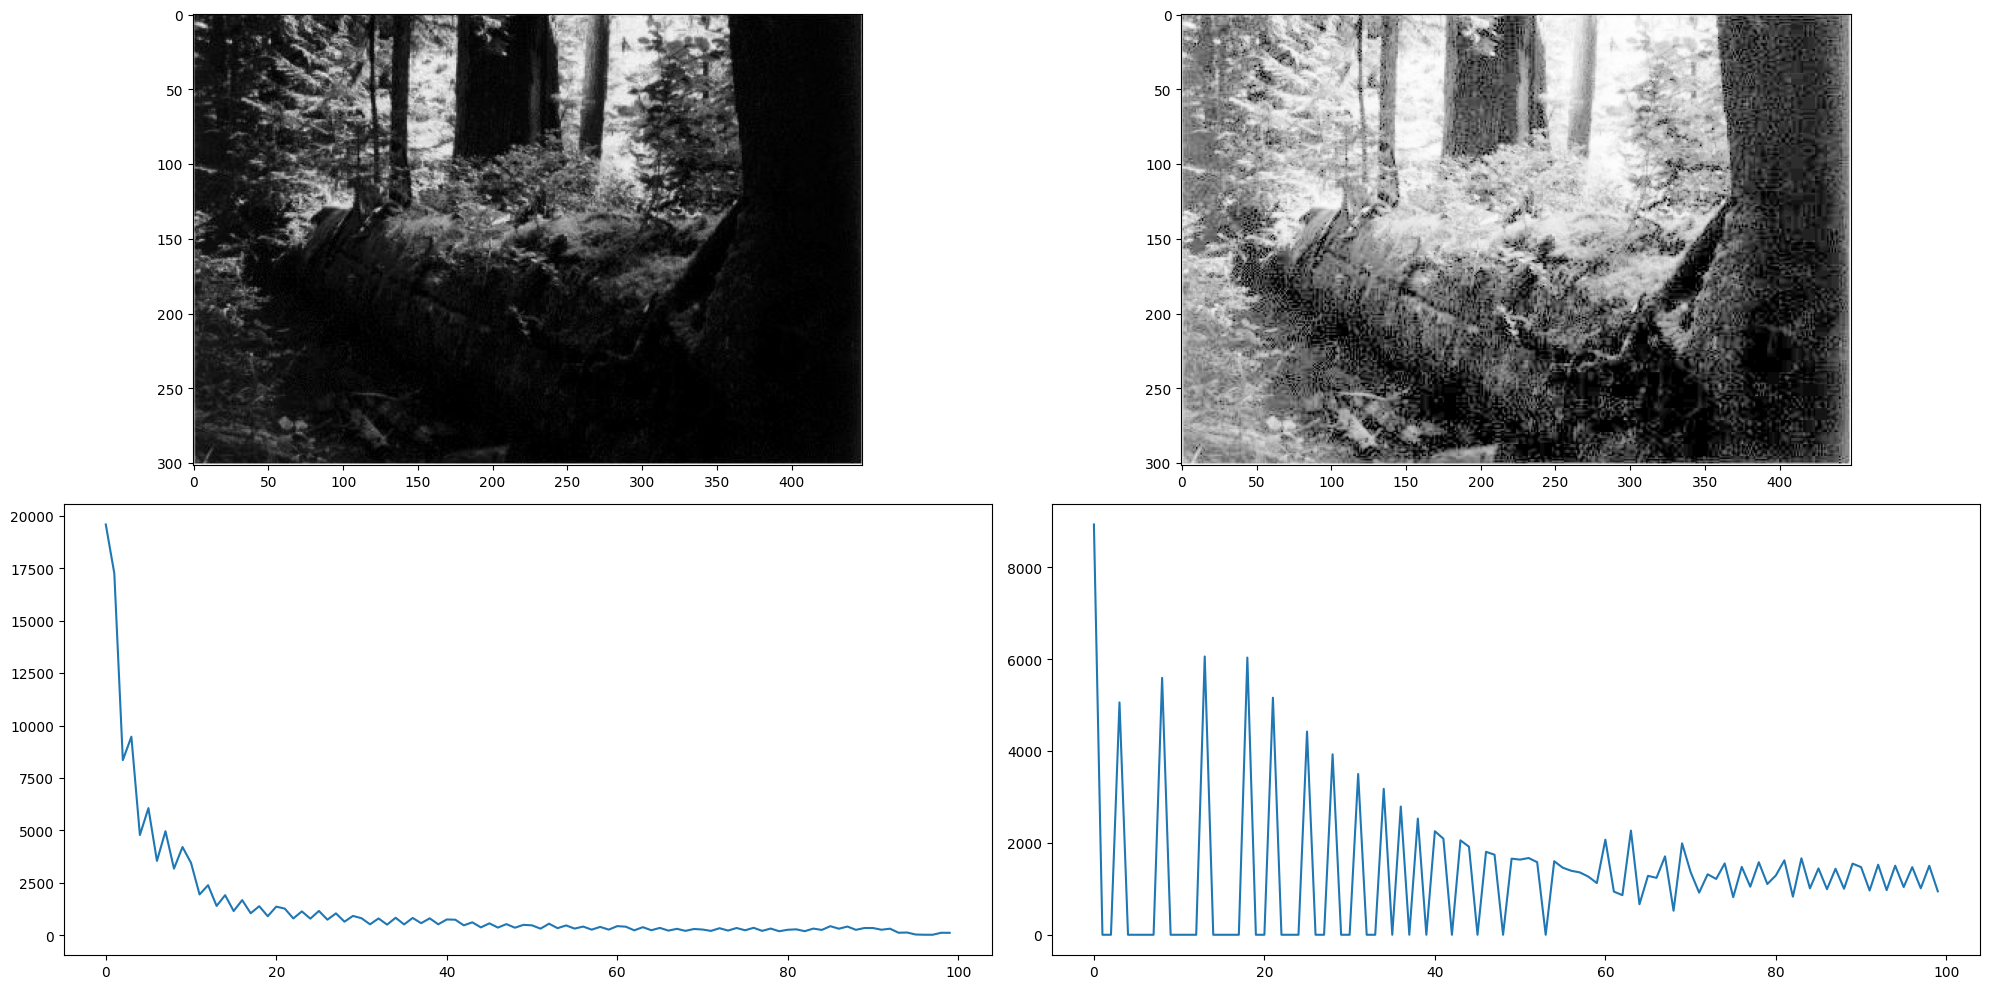

In [40]:
image9 = cv2.imread("IMAGE/forest.jpg", cv2.IMREAD_GRAYSCALE)
hist_9 = cv2.calcHist([image9],[0],None,[bins],[0,255])
image_equalized9 = cv2.equalizeHist(image9) #Altere o nome da imagem
hist_equalized9 = cv2.calcHist([image_equalized9],[0],None,[bins],[0,255])

fig, axes = plt.subplots(2, 2, figsize=(20,10))

axes[0,0].imshow(image9, cmap='gray', vmin=0, vmax=255)
axes[0,1].imshow(image_equalized9, cmap='gray', vmin=0, vmax=255)
axes[1,0].plot(hist_9)
axes[1,1].plot(hist_equalized9)

plt.tight_layout()
plt.show()

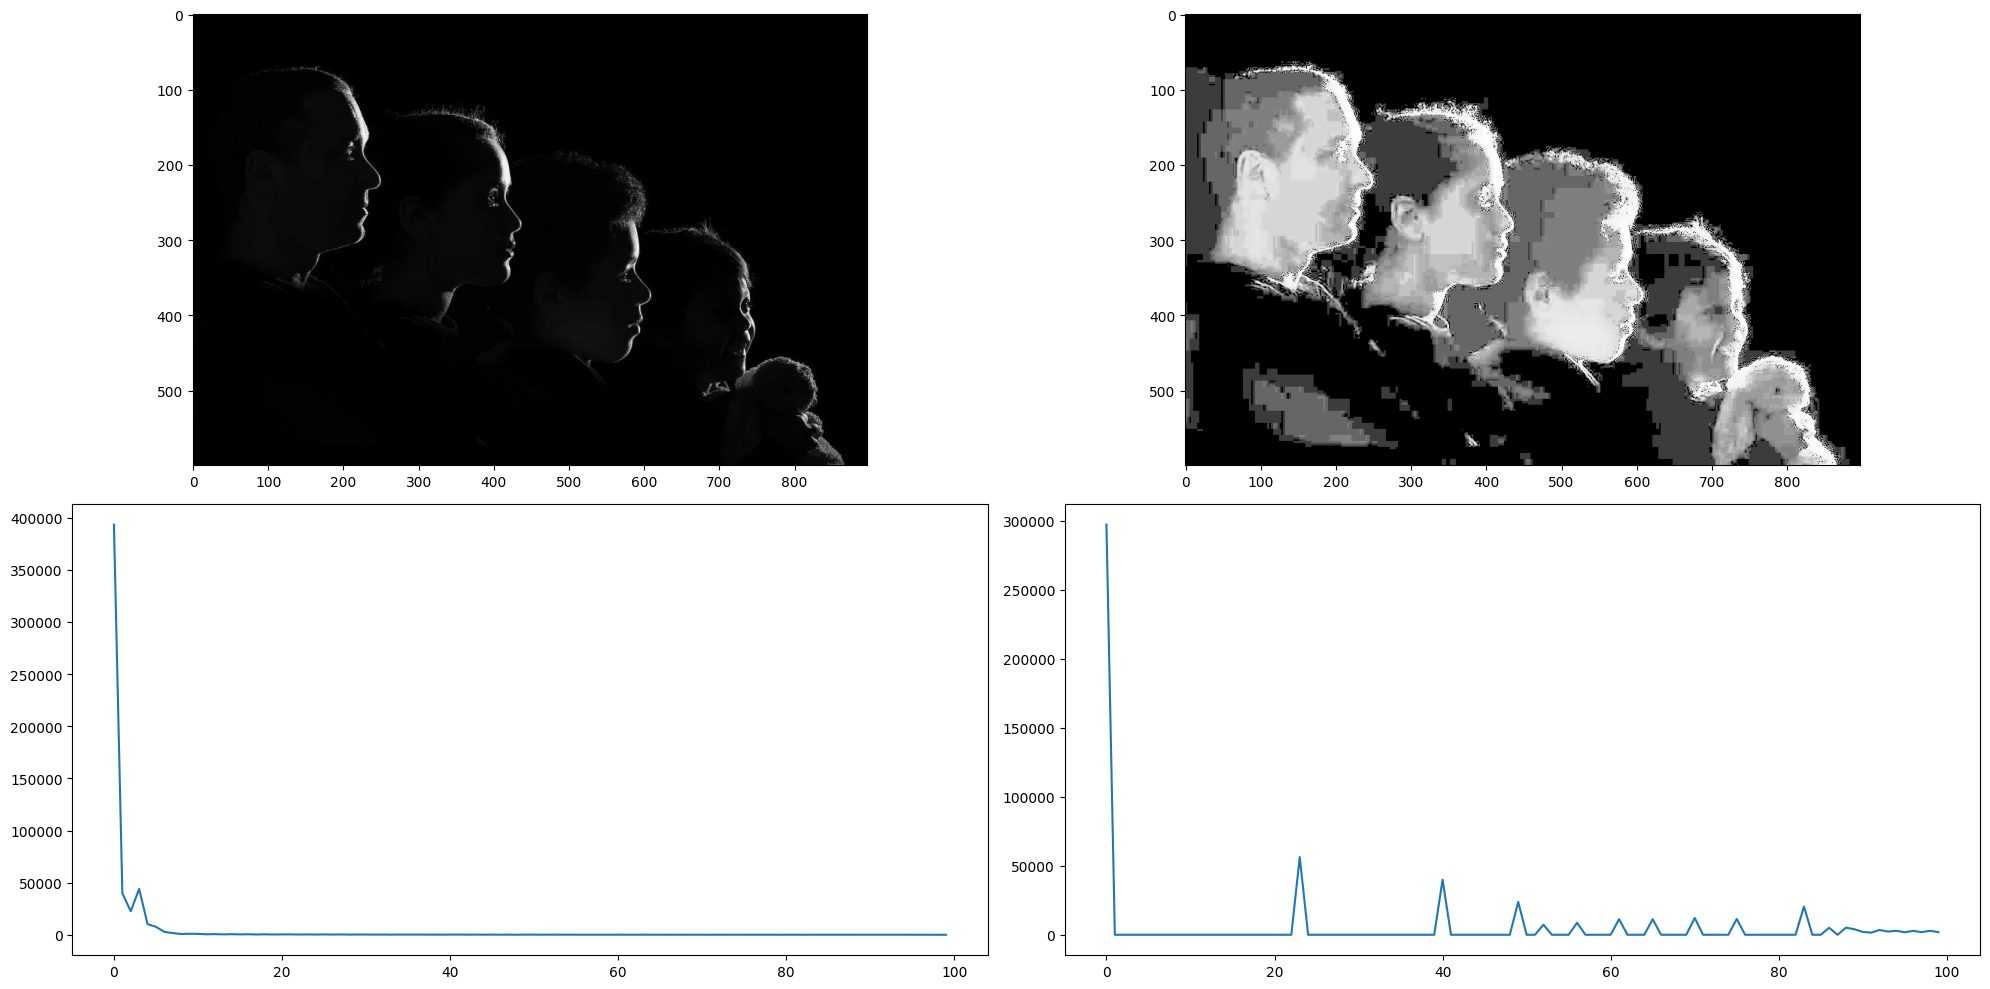

In [42]:
image10 = cv2.imread("IMAGE/persons.jpg", cv2.IMREAD_GRAYSCALE)
hist_10 = cv2.calcHist([image10],[0],None,[bins],[0,255])
image_equalized10 = cv2.equalizeHist(image10) #Altere o nome da imagem
hist_equalized10 = cv2.calcHist([image_equalized10],[0],None,[bins],[0,255])

fig, axes = plt.subplots(2, 2, figsize=(20,10))

axes[0,0].imshow(image10, cmap='gray', vmin=0, vmax=255)
axes[0,1].imshow(image_equalized10, cmap='gray', vmin=0, vmax=255)
axes[1,0].plot(hist_10)
axes[1,1].plot(hist_equalized10)

plt.tight_layout()
plt.show()